## 2. Deep Learning Problem: Multiclass  Classification
### Ex 2: Multiclass Classification Of Flower Species

In [164]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import set_option

Each instance describes the properties of an observed flower measurements and the output variable is specific iris species. The attributes for this dataset can be summarized as follows:
- 1. Sepal length in centimeters. 
- 2. Sepal width in centimeters. 
- 3. Petal length in centimeters. 
- 4. Petal width in centimeters. 
- 5. Species.

In [165]:
df = pd.read_csv('iris.csv')

In [166]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [167]:
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [168]:
df.shape

(150, 5)

In [169]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

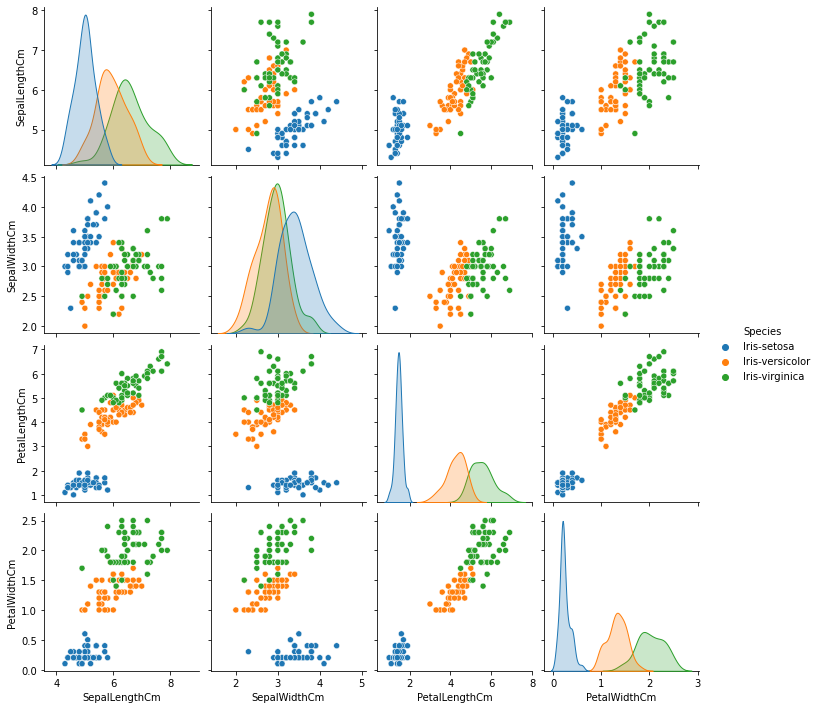

In [170]:
import seaborn as sns
sns.pairplot(df, hue="Species")

In [171]:
df['Species'] = df['Species'].map( {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2} ).astype(int)
df


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [172]:
array = df.values
# separate array into input and output components
X = array[:,0:4]
Y = array[:,4]
print(X)
print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [173]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rescaledX = scaler.fit_transform(X)
X = rescaledX
X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [174]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [175]:
#Transform Y into 3 class nodes
from keras.utils.np_utils import to_categorical
y_cat = to_categorical(Y)
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [176]:
#random_state is for randomly picking the same set of training when we run multiple times
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat,test_size=0.2,random_state=42)

Epoch 1/20
4/4 [==============================] - 1s 93ms/step - loss: 1.1463 - accuracy: 0.3799 - val_loss: 1.2304 - val_accuracy: 0.1667
Epoch 2/20
4/4 [==============================] - 0s 18ms/step - loss: 1.1521 - accuracy: 0.3486 - val_loss: 1.2237 - val_accuracy: 0.1667
Epoch 3/20
4/4 [==============================] - 0s 16ms/step - loss: 1.1493 - accuracy: 0.3821 - val_loss: 1.2175 - val_accuracy: 0.2500
Epoch 4/20
4/4 [==============================] - 0s 18ms/step - loss: 1.1494 - accuracy: 0.3550 - val_loss: 1.2116 - val_accuracy: 0.2500
Epoch 5/20
4/4 [==============================] - 0s 18ms/step - loss: 1.1457 - accuracy: 0.3446 - val_loss: 1.2058 - val_accuracy: 0.2500
Epoch 6/20
4/4 [==============================] - 0s 16ms/step - loss: 1.1197 - accuracy: 0.4160 - val_loss: 1.2004 - val_accuracy: 0.2500
Epoch 7/20
4/4 [==============================] - 0s 17ms/step - loss: 1.1312 - accuracy: 0.3447 - val_loss: 1.1948 - val_accuracy: 0.2500
Epoch 8/20
4/4 [===========

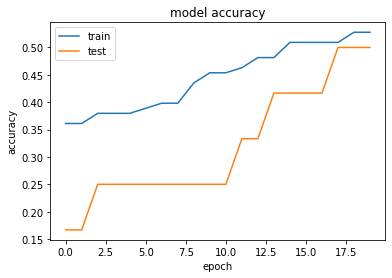

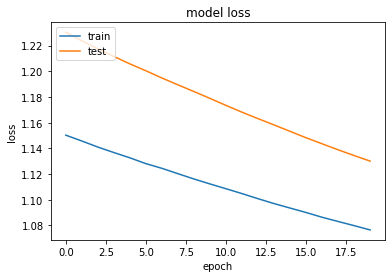

In [177]:
from keras.models import Sequential
from keras.layers import Dense
#4,3
#4,8,3
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)  #default batch size=32
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/20
14/14 [==============================] - 0s 8ms/step - loss: 1.0693 - accuracy: 0.5556 - val_loss: 1.1165 - val_accuracy: 0.5833
Epoch 2/20
14/14 [==============================] - 0s 6ms/step - loss: 1.0595 - accuracy: 0.5926 - val_loss: 1.1024 - val_accuracy: 0.5833
Epoch 3/20
14/14 [==============================] - 0s 6ms/step - loss: 1.0496 - accuracy: 0.5926 - val_loss: 1.0909 - val_accuracy: 0.5833
Epoch 4/20
14/14 [==============================] - 0s 6ms/step - loss: 1.0409 - accuracy: 0.6111 - val_loss: 1.0802 - val_accuracy: 0.5833
Epoch 5/20
14/14 [==============================] - 0s 6ms/step - loss: 1.0325 - accuracy: 0.6111 - val_loss: 1.0707 - val_accuracy: 0.5833
Epoch 6/20
14/14 [==============================] - 0s 5ms/step - loss: 1.0245 - accuracy: 0.6204 - val_loss: 1.0611 - val_accuracy: 0.5833
Epoch 7/20
14/14 [==============================] - 0s 6ms/step - loss: 1.0168 - accuracy: 0.6204 - val_loss: 1.0525 - val_accuracy: 0.5833
Epoch 8/20
14/14 [==

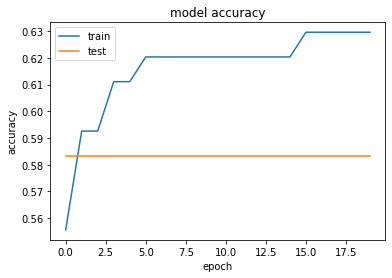

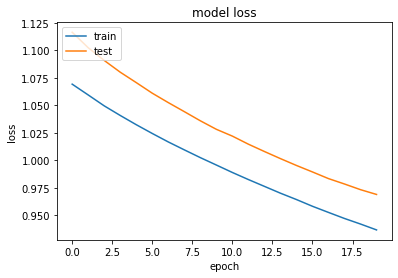

In [178]:
history = model.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.1)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/80
10/10 [==============================] - 1s 38ms/step - loss: 1.0707 - accuracy: 0.2872 - val_loss: 1.0278 - val_accuracy: 0.4000
Epoch 2/80
10/10 [==============================] - 0s 11ms/step - loss: 1.0434 - accuracy: 0.2992 - val_loss: 1.0166 - val_accuracy: 0.4000
Epoch 3/80
10/10 [==============================] - 0s 8ms/step - loss: 1.0345 - accuracy: 0.2964 - val_loss: 1.0056 - val_accuracy: 0.4000
Epoch 4/80
10/10 [==============================] - 0s 8ms/step - loss: 1.0287 - accuracy: 0.2881 - val_loss: 0.9948 - val_accuracy: 0.4500
Epoch 5/80
10/10 [==============================] - 0s 10ms/step - loss: 1.0142 - accuracy: 0.4190 - val_loss: 0.9845 - val_accuracy: 0.5250
Epoch 6/80
10/10 [==============================] - 0s 7ms/step - loss: 0.9856 - accuracy: 0.6084 - val_loss: 0.9754 - val_accuracy: 0.6000
Epoch 7/80
10/10 [==============================] - 0s 8ms/step - loss: 0.9685 - accuracy: 0.7389 - val_loss: 0.9665 - val_accuracy: 0.6000
Epoch 8/80
10/10 

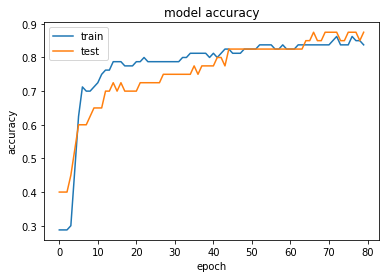

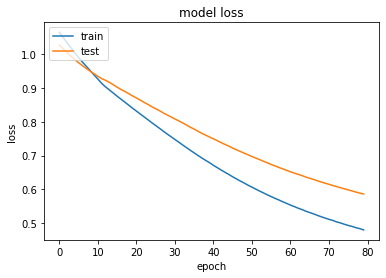

In [179]:
#try another model architecture: 4,8,3
model = Sequential()
model.add(Dense(8, input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=80, batch_size=8, validation_split=0.33)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/80
10/10 [==============================] - 1s 38ms/step - loss: 1.2322 - accuracy: 0.3728 - val_loss: 1.2915 - val_accuracy: 0.2000
Epoch 2/80
10/10 [==============================] - 0s 6ms/step - loss: 1.2197 - accuracy: 0.3316 - val_loss: 1.2439 - val_accuracy: 0.2000
Epoch 3/80
10/10 [==============================] - 0s 6ms/step - loss: 1.1719 - accuracy: 0.4220 - val_loss: 1.2084 - val_accuracy: 0.2000
Epoch 4/80
10/10 [==============================] - 0s 8ms/step - loss: 1.1595 - accuracy: 0.4138 - val_loss: 1.1808 - val_accuracy: 0.2000
Epoch 5/80
10/10 [==============================] - 0s 22ms/step - loss: 1.1402 - accuracy: 0.4066 - val_loss: 1.1541 - val_accuracy: 0.2000
Epoch 6/80
10/10 [==============================] - 0s 11ms/step - loss: 1.1107 - accuracy: 0.4034 - val_loss: 1.1309 - val_accuracy: 0.2000
Epoch 7/80
10/10 [==============================] - 0s 6ms/step - loss: 1.1018 - accuracy: 0.3813 - val_loss: 1.1092 - val_accuracy: 0.2750
Epoch 8/80
10/10 

Epoch 59/80
10/10 [==============================] - 0s 6ms/step - loss: 0.3190 - accuracy: 0.9248 - val_loss: 0.4426 - val_accuracy: 0.9250
Epoch 60/80
10/10 [==============================] - 0s 6ms/step - loss: 0.3058 - accuracy: 0.9634 - val_loss: 0.4337 - val_accuracy: 0.9250
Epoch 61/80
10/10 [==============================] - 0s 6ms/step - loss: 0.3559 - accuracy: 0.9658 - val_loss: 0.4266 - val_accuracy: 0.9500
Epoch 62/80
10/10 [==============================] - 0s 6ms/step - loss: 0.2786 - accuracy: 0.9645 - val_loss: 0.4186 - val_accuracy: 0.9500
Epoch 63/80
10/10 [==============================] - 0s 6ms/step - loss: 0.3510 - accuracy: 0.9341 - val_loss: 0.4109 - val_accuracy: 0.9500
Epoch 64/80
10/10 [==============================] - 0s 6ms/step - loss: 0.3231 - accuracy: 0.9522 - val_loss: 0.3999 - val_accuracy: 0.9500
Epoch 65/80
10/10 [==============================] - 0s 6ms/step - loss: 0.2976 - accuracy: 0.9233 - val_loss: 0.3912 - val_accuracy: 0.9250
Epoch 66/80
1

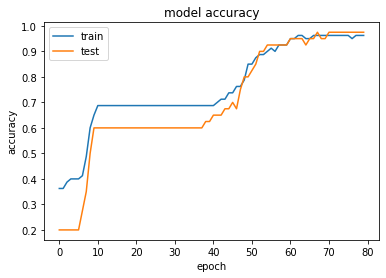

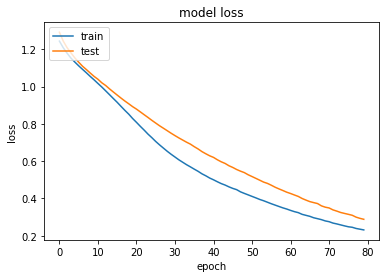

In [180]:
##try another model architecture: 4,16,8,3
model = Sequential()
model.add(Dense(16, input_shape=(4,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=80, batch_size=8, validation_split=0.33)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#4. epoch
#5. batch size

In [181]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[4.8293281e-02, 6.6354430e-01, 2.8816235e-01],
       [9.7616732e-01, 2.3475736e-02, 3.5685473e-04],
       [2.2916116e-04, 2.5659284e-02, 9.7411150e-01],
       [4.0221758e-02, 6.2392825e-01, 3.3584997e-01],
       [2.5320845e-02, 5.0793880e-01, 4.6674040e-01]], dtype=float32)

In [182]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [183]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 120ms/step - loss: 0.2449 - accuracy: 0.9667
Accuracy: 96.67


In [184]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test_class, y_pred_class)
matrix = confusion_matrix(y_test_class, y_pred_class)
report = classification_report(y_test_class, y_pred_class)

print(acc)
print(matrix)
print(report)

0.9666666666666667
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



### Now Put them all together
#### Machine Learning methods Vs. Deep Learning method (ANN) to compare all models with the same training and testing set.

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=42)

model = LogisticRegression(solver='liblinear')
#/*** Please try other methods to see what method should we use ***/#
#model = LinearDiscriminantAnalysis()
#model = KNeighborsClassifier()
#model = GaussianNB()
#model = DecisionTreeClassifier()
#model = SVC()
#model = RandomForestClassifier(n_estimators=100, max_features=3)

model.fit(X_train, y_train)
result = model.score(X_test, y_test) 
print("Accuracy: %.3f%%" % (result*100.0))


predicted = model.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)
report = classification_report(y_test, predicted)
print(report)

Accuracy: 90.000%
[[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.67      0.80         9
         2.0       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30

